### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution.

Given that definition, the topic most recently covered above (expected value) should be recognizable as a measure of central tendency. There are indeed many measures of central tendency (see [here](https://en.wikipedia.org/wiki/Central_tendency)); the mean, median and mode are the most common and we'll detail them in this section.

#### Mean

The most common measure of central tendency of all (so much so that it's synonomous with the lay usage of the term "average"), is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [16]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_experiments = 1000
head_count = np.random.binomial(5, 0.5, n_experiments)

In [3]:
len(head_count)

1000

In [4]:
head_count[0:20]

array([0, 3, 5, 2, 2, 3, 3, 3, 3, 2, 2, 4, 2, 2, 3, 2, 5, 1, 2, 2])

In [5]:
sum(head_count)/n_experiments

np.float64(2.492)

Unsuprisingly, numpy has a function to calculate mean

In [6]:
np.mean(head_count)

np.float64(2.492)

Pretty close! The law of large numbers implies that as we increase the number of experiments (e.g., to a million -- you're welcome to try it), we'll converge on $\mathbb{E}=2.5$.


#### Median 

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [8]:
head_count.sort()
head_count[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint:

In [10]:
head_count[499]


np.int64(2)

In [11]:
head_count[500]

np.int64(2)

In [12]:
(2 + 2)/ 2

2.0

Built in method in numpy

In [13]:
np.median(head_count)

np.float64(2.0)

#### Mode

The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.

As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three.

Method available in the SciPy `stats` module:

In [15]:
st.mode(head_count)

ModeResult(mode=np.int64(2), count=np.int64(356))

In [18]:
st.mode(head_count)[0]

np.int64(2)

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed:

In [19]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

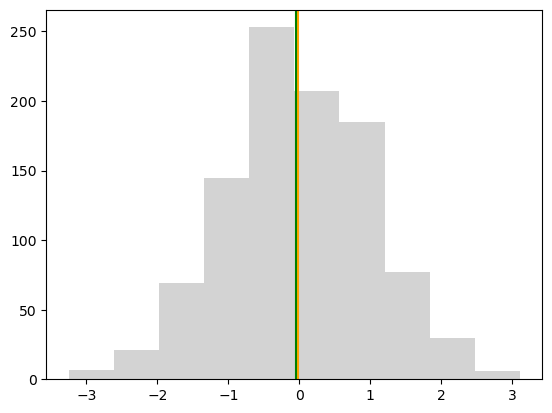

In [20]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail:

In [21]:
x = st.skewnorm.rvs(10, size=1000)

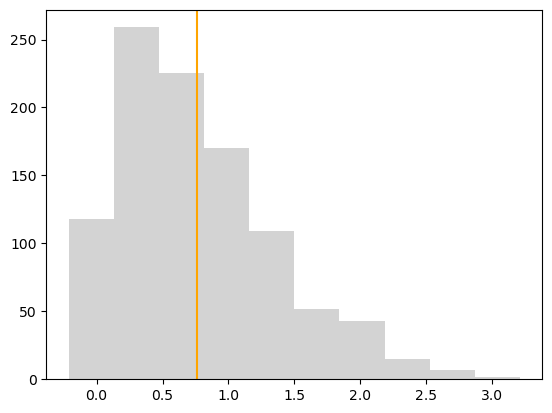

In [22]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice for measure of central tendency:

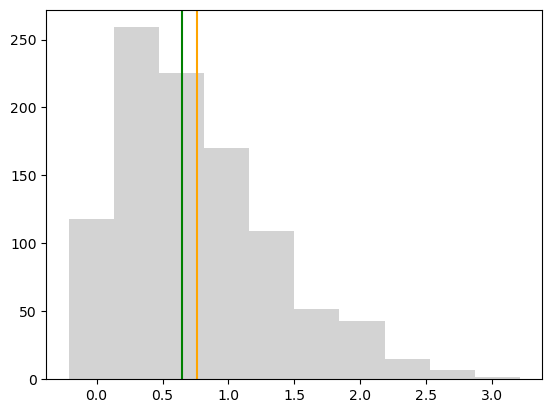

In [24]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')